In [41]:
#Add libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [42]:
#Load data processed on the HPC

prs = pd.read_csv("../data/protein_prs_cases.csv", sep="\t", index_col=0)

prs.head()

,Group,Case,Sex,C4A.C4B.4481.34.2,IL10.2773.50.2,MMP9.2579.17.5,CSF3.8952.65.3,GC.6581.50.3,APOB.2797.56.2,CFH.4159.130.1,...,C3.2755.8.2,PPY.4588.1.2,IGFBP2.2570.72.5,APOE.2937.10.2,FGA.FGB.FGG.4907.56.1,PLG.3710.49.2,TNF.5936.53.3,ANGPT2.13660.76.3,CRP.4337.49.2,VCAM1.2967.8.1
0,A,2,2,-0.069435,-0.034924,-0.126787,0.351996,0.314848,-0.318171,0.195647,...,0.057947,0.749855,0.146249,-0.133883,-2.490502,-0.324963,-0.978661,0.039893,-0.266216,-0.038887
1,A,2,2,-1.071661,-0.421213,-0.872182,0.101832,-0.296282,0.689710,-0.409555,...,-0.903393,0.306309,-1.152134,0.421410,0.405951,0.950770,1.549364,1.410669,-1.659654,2.214628
2,A,2,1,0.321382,-2.000421,-0.126787,0.207792,0.952631,-2.252077,-1.264962,...,1.754089,1.248028,1.187176,-1.003851,-0.848056,-0.324963,-1.076009,0.381713,-0.420168,-0.413070
3,A,2,2,0.575056,-0.256073,0.618608,-1.863235,-0.379302,0.689710,-0.636036,...,-1.259195,-0.329593,-0.662532,-0.133883,1.754016,0.614542,-1.708552,-1.134225,-1.053209,-0.110263
4,A,2,2,1.512781,0.417969,-0.126787,0.091216,-0.337681,-0.318171,-0.115083,...,0.554612,-0.582945,0.512406,0.843965,0.379672,-1.239034,0.858960,-0.683777,-0.344878,-0.487496


              Case          Sex  C4A.C4B.4481.34.2  IL10.2773.50.2  \
count  6244.000000  6244.000000       6.244000e+03    6.244000e+03   
mean      0.686579     0.598334       1.680109e-11    5.011163e-11   
std       0.463921     0.490274       9.998398e-01    9.998398e-01   
min       0.000000     0.000000      -4.668433e+00   -4.345403e+00   
25%       0.000000     0.000000      -6.002675e-01   -6.430882e-01   
50%       1.000000     1.000000       9.656785e-02    2.683902e-03   
75%       1.000000     1.000000       6.379377e-01    6.684051e-01   
max       1.000000     1.000000       3.726789e+00    3.846568e+00   

       MMP9.2579.17.5  CSF3.8952.65.3  GC.6581.50.3  APOB.2797.56.2  \
count    6.244000e+03    6.244000e+03  6.244000e+03    6.244000e+03   
mean    -7.661570e-11   -5.502245e-12 -9.745519e-12   -7.206916e-12   
std      9.998398e-01    9.998398e-01  9.998398e-01    9.998398e-01   
min     -3.478007e+00   -4.257154e+00 -3.182725e+00   -4.349135e+00   
25%     -8.721

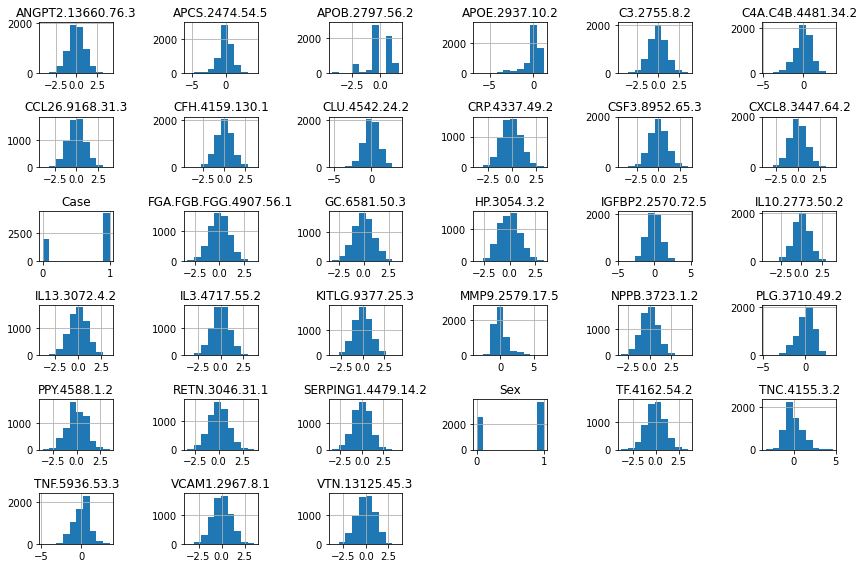

In [69]:
#Review missingness and distribution of variables

print(prs.describe())
print(prs.dtypes)

prs.hist(figsize=(12,8))
plt.tight_layout()

#Finding: consider whether need to further transform PRS (already normalised to Z scores - units of standard deviation)

In [4]:
#Check 3 groups and numbers in each categorical group

prs.groupby("Group").count()

,Case,Sex,APOB.2797.56.2,APOE.2937.10.2,CRP.4337.49.2
Group,,,,,
A,4492,4492,4492,4492,4492
B,1007,1007,1007,1007,1007
C,745,745,745,745,745


In [44]:
#Update case and sex from 2/1 and to dummy variables 1/0
#Case -> 1 = "AD", 0 = "CTL"
#Sex -> 1 = "Female", 0 = "Male"

if (prs["Case"].max() == 2) | (prs["Sex"].max() == 2):
    prs.loc[prs["Case"] == 1, "Case"] = 0
    prs.loc[prs["Case"] == 2, "Case"] = 1

    prs.loc[prs["Sex"] == 1, "Sex"] = 0
    prs.loc[prs["Sex"] == 2, "Sex"] = 1
else:
    print("Already updated")

print(prs[["Case", "Sex"]].describe())

print(prs.groupby("Group")["Case"].sum())

              Case          Sex
count  6244.000000  6244.000000
mean      0.686579     0.598334
std       0.463921     0.490274
min       0.000000     0.000000
25%       0.000000     0.000000
50%       1.000000     1.000000
75%       1.000000     1.000000
max       1.000000     1.000000
Group
A    3277
B     639
C     371
Name: Case, dtype: int64


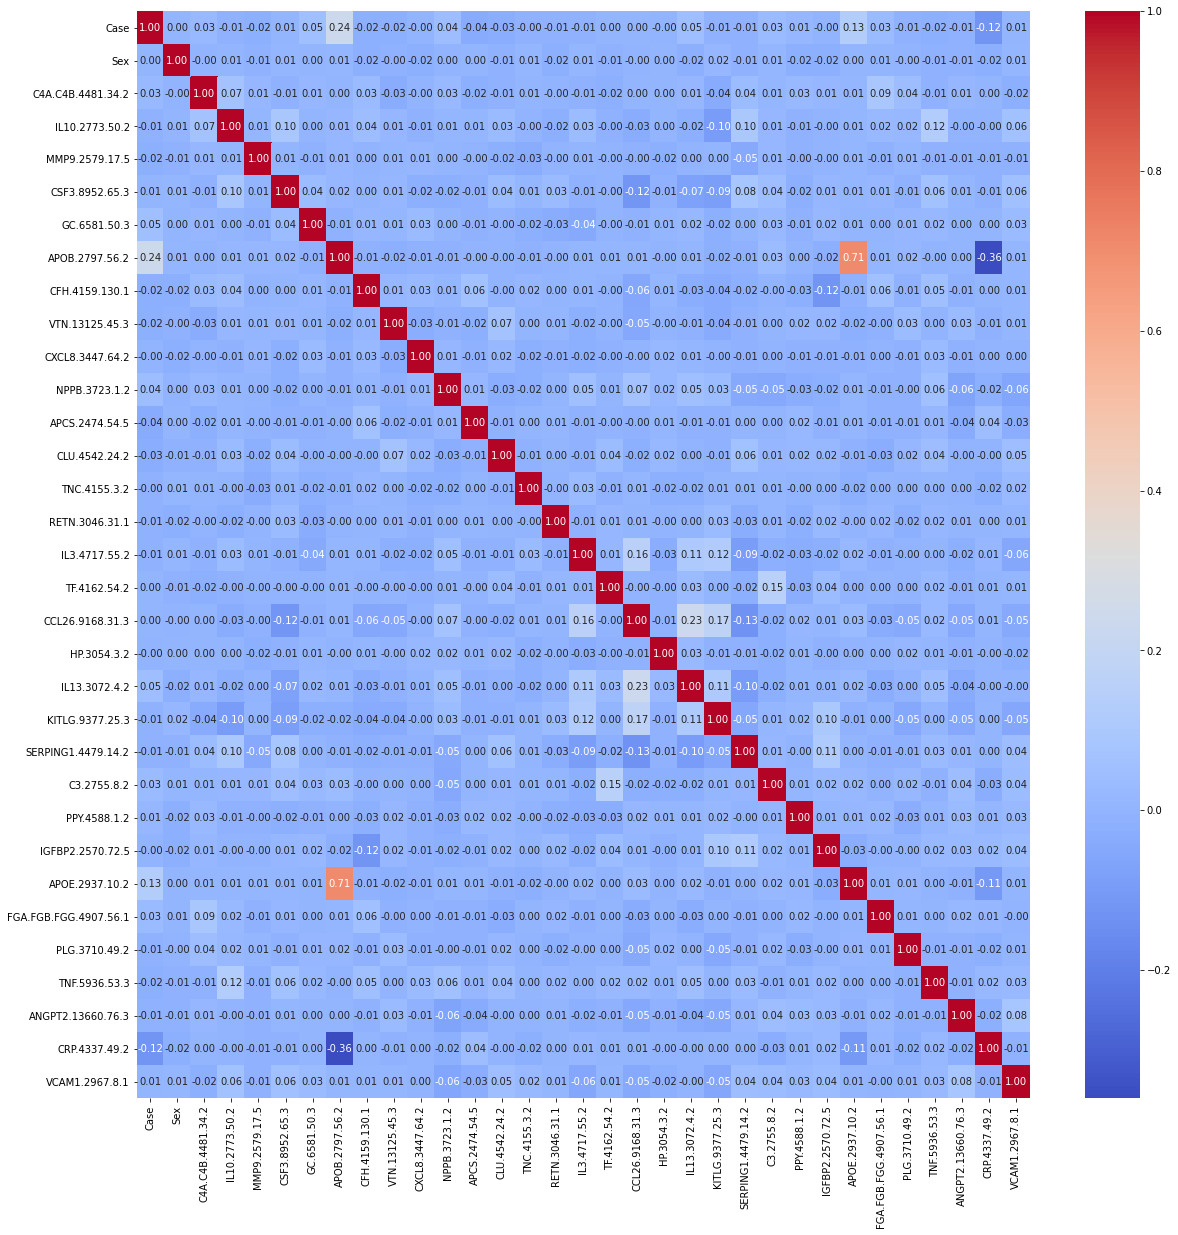

In [53]:
#Check correlation between PRS scores
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(prs.corr(), annot = True, cmap = "coolwarm", ax=ax, fmt=".2f")

#Findings: APOB and APOE are highly correlated (> 0.7). In full, multivariate models consider only selecting one. 
         #No other high correlations (which is surprising)

In [54]:
#SKlearn modules and helper method to assess model performance

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

def assess_model_performance(md, pred, X_test, y_test, model_name, plot=True, univariate=True):
    accuracy_sk = md.score(X_test, y_test)
    auc = roc_auc_score(y_test, md.predict(X_test))
    tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
    sensitivity = tp / (tp + fn) #-> also recall
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    
    if not univariate:
        model_name = "+".join(list(model_name))
    
    result = pd.DataFrame({"model_name":model_name, 
                           "accuracy":accuracy_sk, 
                           "sensitivity": sensitivity, 
                           "specificity":specificity,
                           "precision":precision,
                           "auc":auc}, index=[1])
    
    if plot:
        probas = md.predict_proba(X_test)
        plt.plot(roc_curve(y_test, probas[:,1])[0], roc_curve(y_test, probas[:,1])[1], label=model_name)
        plt.xlabel("FPR")
        plt.ylabel("TPR")
        plt.legend(prop={'size':10}, loc='lower right')
    
    return result

               model_name  accuracy  sensitivity  specificity  precision  \
5          APOB.2797.56.2  0.684177     0.932710     0.142566   0.703312   
24         APOE.2937.10.2  0.687380     0.984112     0.040733   0.690945   
0       C4A.C4B.4481.34.2  0.685458     1.000000     0.000000   0.685458   
16        CCL26.9168.31.3  0.685458     1.000000     0.000000   0.685458   
28      ANGPT2.13660.76.3  0.685458     1.000000     0.000000   0.685458   
27          TNF.5936.53.3  0.685458     1.000000     0.000000   0.685458   
26          PLG.3710.49.2  0.685458     1.000000     0.000000   0.685458   
25  FGA.FGB.FGG.4907.56.1  0.685458     1.000000     0.000000   0.685458   
23       IGFBP2.2570.72.5  0.685458     1.000000     0.000000   0.685458   
22           PPY.4588.1.2  0.685458     1.000000     0.000000   0.685458   
21            C3.2755.8.2  0.685458     1.000000     0.000000   0.685458   
20     SERPING1.4479.14.2  0.685458     1.000000     0.000000   0.685458   
19        KI

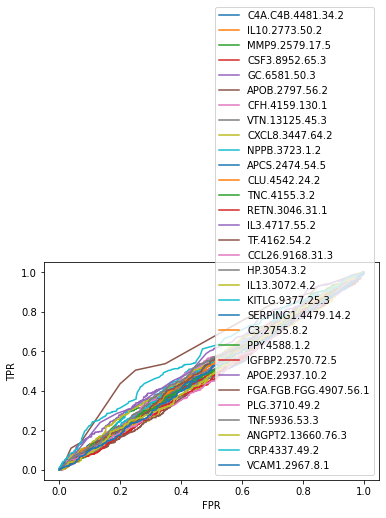

In [55]:
#Build univariate logistic regression models with each PRS single input using sklearn and calculate classification performance metrics

PROTEINS = list(prs.iloc[:, 3:].columns)
RESULTS = pd.DataFrame()

for protein in PROTEINS:
    x_train, x_test, y_train, y_test = train_test_split(prs[protein], prs["Case"], test_size=0.25, random_state=0)

    logr = LogisticRegression()

    X_train = np.array(x_train).reshape(-1,1)
    X_test = np.array(x_test).reshape(-1,1)

    md = logr.fit(X_train, y_train)

    pred = md.predict(X_test)

    result = assess_model_performance(md, pred, X_test, y_test, protein)
    RESULTS = RESULTS.append(result, ignore_index = True)

RESULTS.sort_values(by="auc", ascending=False, inplace=True)
print(RESULTS)
#NOTE - interesting that logr seems to apply method inplace, so could use md and logr interchangeably unless wanted to create copies

#Finding - Individual proteins not robust classifiers as AUC similar to chance. 
    #Classification weakness appears to be driven by inability to identify true negatives - effectively classifying everything as AD (training data does have high proportion of cases, much higher than a typical population)
    

In [30]:
#Build univariate logistic regression model using statsmodel (to assess R^2 and p-values)
import statsmodels.api as sm

for protein in PROTEINS:
        x_train, x_test, y_train, y_test = train_test_split(prs[protein], prs["Case"], test_size=0.25, random_state=0)
        #manually add intercept
        x_train = sm.add_constant(x_train)
        
        sm_md = sm.Logit(y_train, x_train).fit()
        
        print(sm_md.summary())
        
        x_test = sm.add_constant(x_test)
        
        sm_pred = sm_md.predict(x_test)
        
        auc = roc_auc_score(y_test, sm_pred)
        print(protein,"AUC", auc)
        
        


In [57]:
#Build multivariate logistic regression models for all possible combinations of PRS

#get all combinations of proteins
from itertools import combinations

#select 5 proteins used in MR analysis
PROTEINS = ["APOE.2937.10.2", "APOB.2797.56.2", "IGFBP2.2570.72.5", "GC.6581.50.3", "CRP.4337.49.2"]

RESULTS = pd.DataFrame()

for num in range(2, len(PROTEINS)+1):
    comb = combinations(PROTEINS, num)
    for i in list(comb):
        x_train, x_test, y_train, y_test = train_test_split(prs[(list(i))], prs["Case"], test_size=0.25, random_state=0)

        logr = LogisticRegression()

        X = np.array(x_train).reshape(-num,num)
        X_test = np.array(x_test).reshape(-num,num)

        md = logr.fit(X, y_train)

        pred = md.predict(X_test)

        result = assess_model_performance(md, pred, X_test, y_test, i, plot=False, univariate=False)
        RESULTS = RESULTS.append(result, ignore_index = True)

RESULTS.sort_values(by="auc", ascending=False, inplace=True)
print(RESULTS)

#Finding - requires too much computational time and resource to test all possible combinations of 31 proteins

                                           model_name  accuracy  sensitivity  \
4                     APOB.2797.56.2+IGFBP2.2570.72.5  0.684177     0.932710   
6                        APOB.2797.56.2+CRP.4337.49.2  0.684177     0.932710   
16       APOB.2797.56.2+IGFBP2.2570.72.5+GC.6581.50.3  0.682896     0.929907   
24  APOB.2797.56.2+IGFBP2.2570.72.5+GC.6581.50.3+C...  0.683536     0.931776   
18          APOB.2797.56.2+GC.6581.50.3+CRP.4337.49.2  0.683536     0.931776   
17      APOB.2797.56.2+IGFBP2.2570.72.5+CRP.4337.49.2  0.683536     0.931776   
0                       APOE.2937.10.2+APOB.2797.56.2  0.684177     0.933645   
11         APOE.2937.10.2+APOB.2797.56.2+GC.6581.50.3  0.686099     0.939252   
5                         APOB.2797.56.2+GC.6581.50.3  0.682255     0.929907   
10     APOE.2937.10.2+APOB.2797.56.2+IGFBP2.2570.72.5  0.683536     0.933645   
22  APOE.2937.10.2+APOB.2797.56.2+GC.6581.50.3+CRP...  0.684177     0.937383   
25  APOE.2937.10.2+APOB.2797.56.2+IGFBP2